In [2]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# em stat_lib --> definição do que é colors
colors

['yellow', 'blue', 'red']

### Medido a glicemina no lab e apresentando resultados

O que você faz no lab?

Primeiro, você convoca 30 pacientes (escolher - critérios inclusão x exclusão)   
Explica o experimento que está fazendo e pede autorização (consentimento assistido).  
Em um determinado dia você recolhe amostras para exame de glicemia, pós-jejum.  
Depois, medica os pacientes.  
Passados 24 h você recolhe novas amostras, pós-jejum, e faz a comparação.

**Qual o erro neste desenho experimental???**

Faltou o placebo ! O falso medicamento  
Effeito "psicológico"  
Tem que demonstrar que os Pacientes que tomaram Placebo estão próximos do Controle  
Os medicados longe do Controle e do Placebo.

Ainda poderia ter um Controle Positivo: uma droga anti-glicêmica de mercado!

In [4]:
muC = 140; sdvC = 15
muH = 110; sdvH = 15
muM = 105; sdvM = 12
N   = 30

sampC = np.random.normal(loc=muC, scale=sdvC, size=N)
sampH = np.random.normal(loc=muH, scale=sdvH, size=N)
sampM = np.random.normal(loc=muM, scale=sdvM, size=N)

mucC = np.mean(sampC); sdvcC = np.std(sampC)
mucH = np.mean(sampH); sdvcH = np.std(sampH)
mucM = np.mean(sampM); sdvcM = np.std(sampM)

### O que vocẽ faz no lab? No Prisma ...

In [5]:
df = pd.DataFrame([sampC, sampH, sampM]).T
df.columns = ['control', 'masc', 'fem']
df.head()

,control,masc,fem
0,142.086406,133.731424,116.306298
1,131.895205,117.248149,122.719970
2,160.164851,118.920760,84.255671
3,128.319960,78.903097,101.673609
4,140.963829,100.914902,94.583819


## Empilhamento (stack) - valor x classe

In [6]:
dfs = pd.DataFrame([sampC, ['control']*len(sampC)]).T
dfs.columns = ['val', '_class']

dfa = pd.DataFrame([sampH, ['masc']*len(sampC)]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfa = pd.DataFrame([sampM, ['fem']*len(sampC)]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfs.shape, dfs['_class'].unique()                   

((90, 2), array(['control', 'masc', 'fem'], dtype=object))

In [7]:
dfs.head(3)

,val,_class
0,142.086,control
1,131.895,control
2,160.165,control


In [8]:
dfs.tail(3)

,val,_class
27,94.0814,fem
28,98.5528,fem
29,97.7906,fem


### Barplot com Seaborn

https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0.5, 0, '')

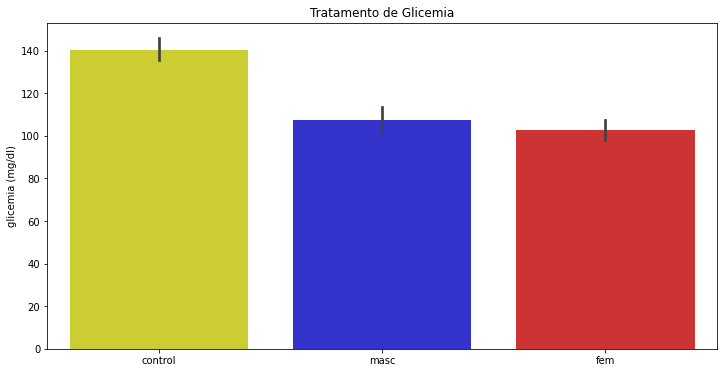

In [9]:
plt.figure(figsize=(12,6))

colors = ['yellow', 'blue', 'red']
ci = 95

ax = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci)
plt.title("Tratamento de Glicemia")
plt.ylabel('glicemia (mg/dl)')
plt.xlabel('')

In [10]:
retH, textH, text_statH, statH, pvalueH = ttest(sampC, sampH, equal_var=False)
textH, text_statH

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 4.17e-11 (***)')

In [11]:
retM, textM, text_statM, statM, pvalueM = ttest(sampC, sampM, equal_var=False)
textM, text_statM

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 9.66e-15 (***)')

In [12]:
retx, textx, text_statx, statx, pvaluex = ttest(sampH, sampM, equal_var=False)
textx, text_statx

('As distribuições são similares (não se rejeita a H0)',
 'p-value 2.27e-01 (NS)')

### Karamba!!! aonde estão as funções?

  - Porque não declarei as funções no Jupyter Notebook
  - as funções estão em stat_lib.py (../libs/)

### Significância

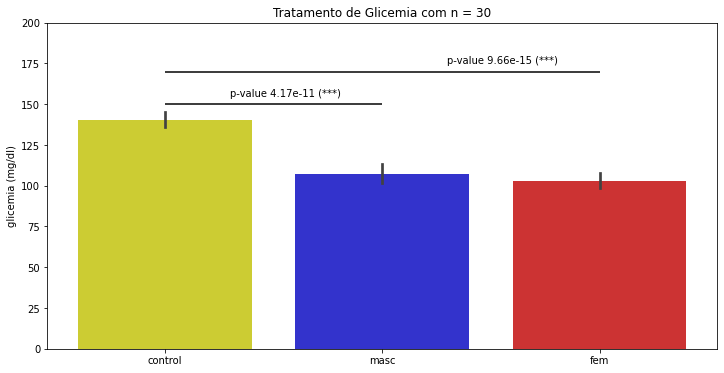

In [14]:
plt.figure(figsize=(12,6))

colors = ['yellow', 'blue', 'red']
ci = 95

ax = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci)
plt.title("Tratamento de Glicemia com n = %d"%(N))
plt.ylabel('glicemia (mg/dl)')
plt.xlabel('')

y1 = 150; del_y1 = 5; xmin=0; xmax=1
plt.hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
plt.text(x=.3, y=y1+del_y1, s=text_statH)

y2 = 170; del_y2 = 5; xmin=0; xmax=2
plt.hlines(y=y2, xmin=xmin, xmax=xmax, colors='black')
plt.text(x=1+.3, y=y2+del_y2, s=text_statM)

plt.ylim(0, 200);

### As distribuições são nomais? teste de Shapiro-Wilkis

In [15]:
retNormC, textNormC, text_statNormC, statNormC, pvalueNormC = test_normality_desc(sampC, 0.05)
textNormC, text_statNormC

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 1.04e-01 (NS)')

In [16]:
retNormH, textNormH, text_statNormH, statNormH, pvalueNormH = test_normality_desc(sampH, 0.05)
textNormH, text_statNormH

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 9.99e-01 (NS)')

In [17]:
retNormM, textNormM, text_statNormM, statNormM, pvalueNormM = test_normality_desc(sampM, 0.05)
textNormM, text_statNormM

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 1.46e-01 (NS)')

### ANOVA - análise de variância (Ronald Fisher)

In [18]:
stats.f_oneway(sampC, sampH, sampM)

F_onewayResult(statistic=55.68746921812191, pvalue=2.68170790453256e-16)

In [19]:
# está no stat_lib
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA3(sampC, sampH, sampM, alpha = 0.05)
text, text_stat

('As distribuições não têm variâncias similares (rejeita-se a H0)',
 'p-value 2.68e-16 (***)')

### Mas quem é diferente???

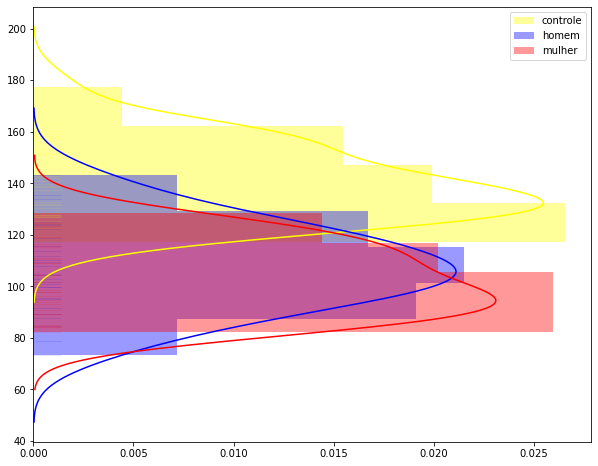

In [32]:
plt.figure(figsize=(10,8))
ax   = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', label='controle', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,})
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   label='homem',    vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax)
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    label='mulher',   vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)
plt.legend();

Text(0.5, 1.0, 'distribuições')

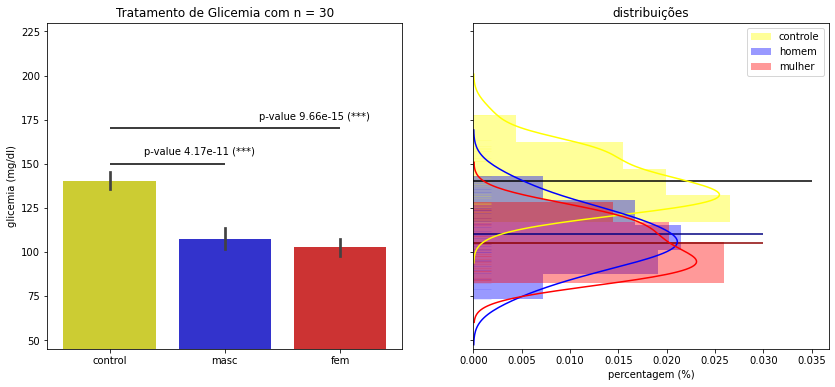

In [31]:
colors = ['yellow', 'blue', 'red']
ci = 95

# plt.figure(figsize=(12,6))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharey=True)

ret = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci, ax=ax[0])

ax[0].set_ylabel('glicemia (mg/dl)')
ax[0].set_xlabel('')

ax[0].set_title("Tratamento de Glicemia com n = %d"%(N))


y1 = 150; del_y1 = 5; xmin=0; xmax=1
ax[0].hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
ax[0].text(x=.3, y=y1+del_y1, s=text_statH)

y2 = 170; del_y2 = 5; xmin=1; xmax=2
ax[0].hlines(y=y2, xmin=0, xmax=xmax, colors='black')
ax[0].text(x=1+.3, y=y2+del_y2, s=text_statM)

ax[0].set_ylim(45, 230);

'''
retC = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,}, ax=ax[1])
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax[1])
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax[1])
'''
retC = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', label='controle', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,}, ax=ax[1])
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   label='homem',    vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax[1])
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    label='mulher',   vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax[1])

ax[1].legend()

ax[1].hlines(y=muC, xmin=0, xmax=0.035, colors='black')
ax[1].hlines(y=muH, xmin=0, xmax=0.030, colors='navy')
ax[1].hlines(y=muM, xmin=0, xmax=0.030, colors='darkred')

ax[1].set_ylabel('')
ax[1].set_xlabel('percentagem (%)')
ax[1].set_title("distribuições")


### SEM = SSD / sqrt(n)

### Intervalo de confiança

In [33]:
alpha=.05

CI1, SEM1, nC, nH, effect_size1, diff1 = calc_intervalo_confianca(sampC, sampH, alpha=alpha)

delIC1 = (CI1[0]-CI1[1])/2
list(np.round(CI1,2)), np.round(delIC1,1)

([-41.08, -24.8], -8.1)

In [34]:
CI2, SEM2, nC, nH, effect_size2, diff2 = calc_intervalo_confianca(sampC, sampM, alpha=alpha)

delIC2 = (CI2[0]-CI2[1])/2
list(np.round(CI2,2)), np.round(delIC2,1)

([-45.15, -30.43], -7.4)

In [36]:
N

30

In [39]:
# alpha = a comparação é somente se diminuiu ! - é monocaudal
gamma = stats.t.ppf(0.025, N-1)
gamma

-2.0452296421327034

In [43]:
gamma = stats.t.ppf(0.975, N-1)
gamma

2.045229642132703

### Como calcula-se a barra de erro:

metade altura = gamma * SEM  
  
gamma ~  2  
  
SEM = SSD / sqrt(n) ~ 15 / sqrt(n=30) ~ 15 / 5 = 3  

metade altura ~ 2 * 3  = 6



In [44]:
SEM0 = sdvcC/np.sqrt(N)
SEM1 = sdvcH/np.sqrt(N)
SEM2 = sdvcM/np.sqrt(N)

erro0 = gamma * SEM0
erro1 = gamma * SEM1
erro2 = gamma * SEM2

erro0, erro1, erro2

(5.324752359315673, 6.156826723665716, 5.08319731649986)

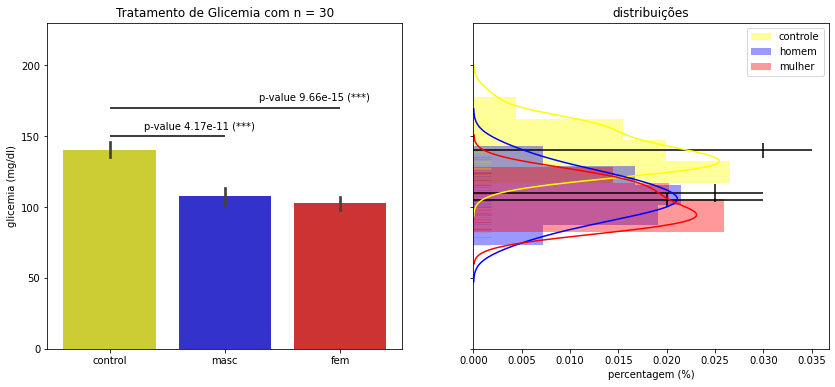

In [47]:
# colors = ['yellow', 'blue', 'red']
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharey=True)

ret = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci, ax=ax[0])
ax[0].set_ylim(0, 230);

ax[0].set_ylabel('glicemia (mg/dl)')
ax[0].set_xlabel('')

ax[0].set_title("Tratamento de Glicemia com n = %d"%(N))


y1 = 150; del_y1 = 5; xmin=0; xmax=1
ax[0].hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
ax[0].text(x=.3, y=y1+del_y1, s=text_statH)

y2 = 170; del_y2 = 5; xmin=1; xmax=2
ax[0].hlines(y=y2, xmin=0, xmax=xmax, colors='black')
ax[0].text(x=1+.3, y=y2+del_y2, s=text_statM)

'''
retC = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,}, ax=ax[1])
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax[1])
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax[1])
'''
retC = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', label='controle', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,}, ax=ax[1])
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   label='homem',    vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax[1])
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    label='mulher',   vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax[1])

ax[1].legend()

ax[1].hlines(y=muC, xmin=0, xmax=0.035, colors='black')
ax[1].hlines(y=muH, xmin=0, xmax=0.03,  colors='black')
ax[1].hlines(y=muM, xmin=0, xmax=0.03,  colors='black')

# barra de erro corresponde fi*SEM

ax[1].vlines(x=0.030, ymin=muC+erro0, ymax=muC-erro0, colors='black')
ax[1].vlines(x=0.025, ymin=muH+erro1, ymax=muH-erro1, colors='black')
ax[1].vlines(x=0.020, ymin=muM+erro2, ymax=muM-erro2, colors='black')

ax[1].set_ylabel('')
ax[1].set_xlabel('percentagem (%)')
ax[1].set_title("distribuições");


In [48]:
dfs.head()

,val,_class
0,142.086,control
1,131.895,control
2,160.165,control
3,128.32,control
4,140.964,control


<AxesSubplot:xlabel='_class', ylabel='val'>

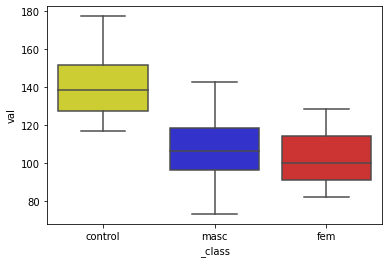

In [49]:
sns.boxplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors)

### Tudo junto e misturado

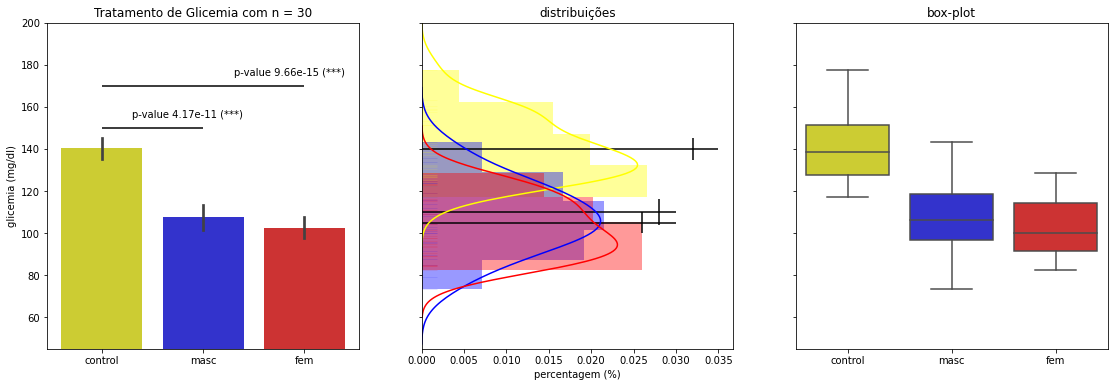

In [50]:
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,6), sharey=True)

ret = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci, ax=ax[0])
ax[0].set_ylim(0, 230);

ax[0].set_ylabel('glicemia (mg/dl)')
ax[0].set_xlabel('')

ax[0].set_title("Tratamento de Glicemia com n = %d"%(N))


y1 = 150; del_y1 = 5; xmin=0; xmax=1
ax[0].hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
ax[0].text(x=.3, y=y1+del_y1, s=text_statH)

y2 = 170; del_y2 = 5; xmin=1; xmax=2
ax[0].hlines(y=y2, xmin=0, xmax=xmax, colors='black')
ax[0].text(x=1+.3, y=y2+del_y2, s=text_statM)

#-- ampliar o grafico
ax[0].set_ylim(45,200)

retC = sns.distplot(sampC, kde=True, rug=True, norm_hist=True, color='yellow', vertical=True, rug_kws={"color": 'yellow', "alpha": .1,}, ax=ax[1])
retH = sns.distplot(sampH, kde=True, rug=True, norm_hist=True, color='blue',   vertical=True, rug_kws={"color": 'blue',  "alpha": .1,}, ax=ax[1])
retM = sns.distplot(sampM, kde=True, rug=True, norm_hist=True, color='red',    vertical=True, rug_kws={"color": 'red',  "alpha": .1,}, ax=ax[1])

ax[1].hlines(y=muC, xmin=0, xmax=0.035, colors='black')
ax[1].hlines(y=muH, xmin=0, xmax=0.03,  colors='black')
ax[1].hlines(y=muM, xmin=0, xmax=0.03,  colors='black')

# barra de erro corresponde fi*SEM

ax[1].vlines(x=0.032, ymin=muC+erro0, ymax=muC-erro0, colors='black')
ax[1].vlines(x=0.028, ymin=muH+erro1, ymax=muH-erro1, colors='black')
ax[1].vlines(x=0.026, ymin=muM+erro2, ymax=muM-erro2, colors='black')

ax[1].set_ylabel('')
ax[1].set_xlabel('percentagem (%)')
ax[1].set_title("distribuições");


sns.boxplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_title("box-plot");